<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/hw2/Copy_of_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
import matplotlib.pyplot as plt

# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


/Users/home/miniconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [3]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, 
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution of 100 elements

In [5]:
np.random.chisquare?

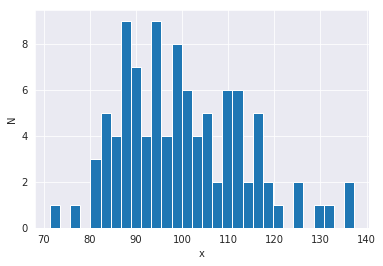

In [6]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty dictionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [7]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes 

In [8]:
# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
mysize = (2000 / (np.array(range(1, 1000)))).astype(int)

# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (999,)


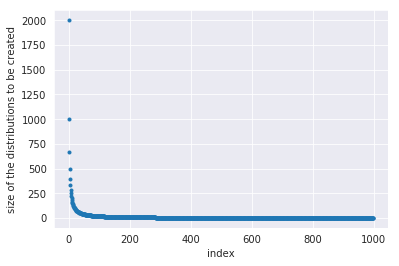

In [9]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

In [10]:
# fill dictionary in in a for loop. not pythonic, but easily readable
newdict = {}
newdict['chisq'] = {}
for n in mysize:
    newdict['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

Text(1259.94, 100, 'expected mean')

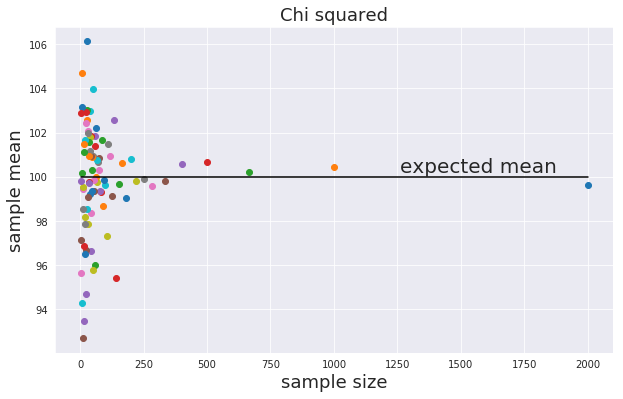

In [11]:
# save the means for plotting later    

newdict['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in newdict['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        newdict['chisq']['means'][nn] = newdict['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, newdict['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: Each dot represent the mean of each of the 999 samples of different size (between 3 and 2000) that follow the chi-square distribution. For samples of small size ($\sim 0$ to $\sim 250$), the mean varies more beyond the expected mean 100. For larger samples ($\sim 250$ to $2000$), the variation of the mean, from the expected mean, are smaller. If we continue to increazed the sample size, the variations would be even smaller

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

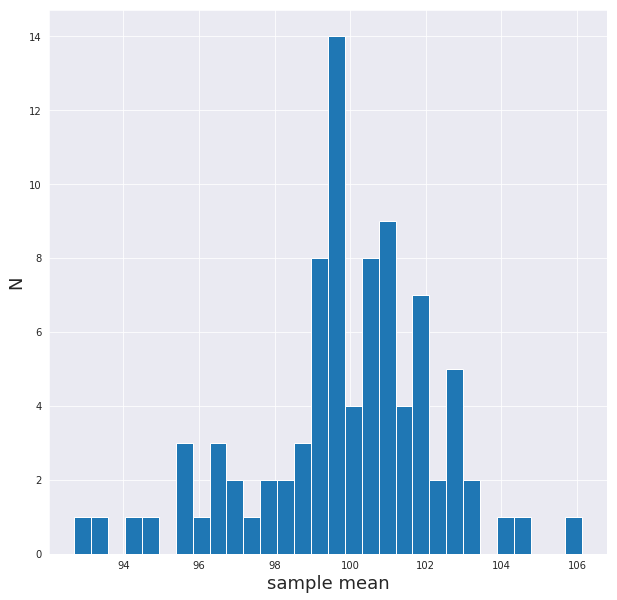

In [12]:
allmeans = list(newdict['chisq']['means'].values())

pl.figure(figsize=(10, 10))
y = pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Histogram of the distribution of the means of each one of the 999 samples with different sizes that follow the chi-squared distribution. The most recurrent mean value for the distributions is between 99.5 and 100 with 14 counts, which is closed to expected mean value. Tha mean values go between ~93 and ~106.


# Do it for the Normal distribution


In [13]:
np.random.normal?

In [14]:
# fill dictionary in in a for loop. not pythonic, but easily readable
# newdict = {}
newdict['lnorm'] = {}
np.random.seed(34)
mysize = (2000 / (np.array(range(1, 1000)))).astype(int)
for n in mysize:
    newdict['lnorm'][n] = np.random.normal(df, size = n) #all distributions have mean=df=100

Text(1259.94, 100, 'expected mean')

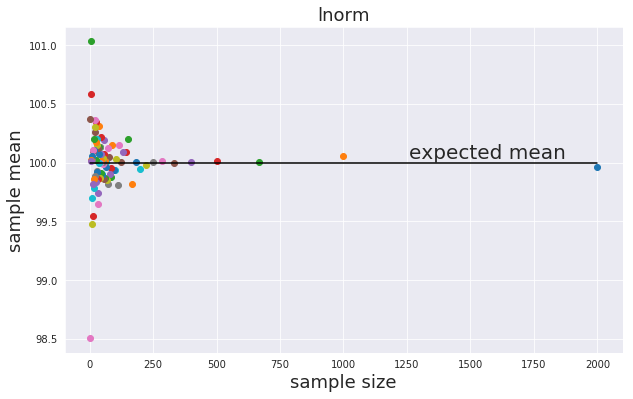

In [15]:
# save the means for plotting later    

newdict['lnorm']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in newdict['lnorm']:
    if not type(nn) == str: # needed because one element is "mean"
        newdict['lnorm']['means'][nn] = newdict['lnorm'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, newdict['lnorm']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('lnorm', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 4: For the Normal distribution, for samples of small size  ($\sim 0$ to $\sim 250$), the mean varies more beyond the expected mean 100. For larger samples ($\sim 250$ to $2000$), the variation of the mean, from the expected mean, are smaller. If we continue to increazed the sample size, the variations would be even smaller

Text(0, 0.5, 'N')

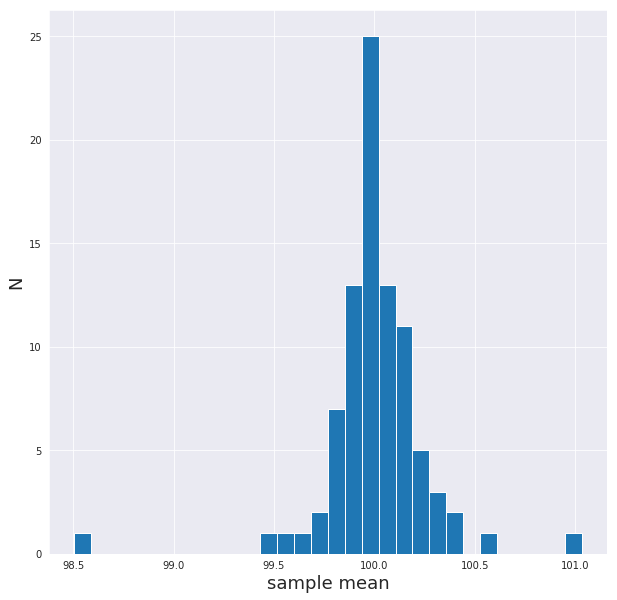

In [16]:
allmeans = list(newdict['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
y = pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 5: Histogram of the distribution of the means of each one of the 999 samples with different sizes that follow the normal distribution. The most recurrent mean value for the distributions is between 99.5 and 100 with 17 counts, which is closed to expected mean value. Tha mean values go between ~99.94 and ~100.02.



# Do it for the Poisson distribution

In [17]:
np.random.poisson?

In [18]:
# fill dictionary in in a for loop. not pythonic, but easily readable
# newdict = {}
newdict['pois'] = {}
np.random.seed(34)
for n in mysize:
    newdict['pois'][n] = np.random.poisson(df, size = n) #all distributions have mean=df=100

Text(1259.94, 100, 'expected mean')

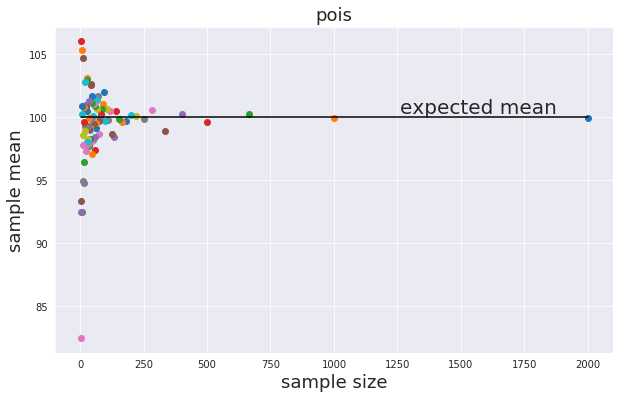

In [19]:
# save the means for plotting later    

newdict['pois']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in newdict['pois']:
    if not type(nn) == str: # needed because one element is "mean"
        newdict['pois']['means'][nn] = newdict['pois'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, newdict['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('pois', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 6: Each dot represent the mean of each of the 999 samples of different size (between 3 and 2000) that follow the Poisson distribution. For samples of small size ($\sim 0$ to $\sim 250$), the mean varies more beyond the expected mean 100. For larger samples ($\sim 250$ to $2000$), the variation of the mean, from the expected mean, are smaller. If we continue to increazed the sample size, the variations would be even smaller.

Text(0, 0.5, 'N')

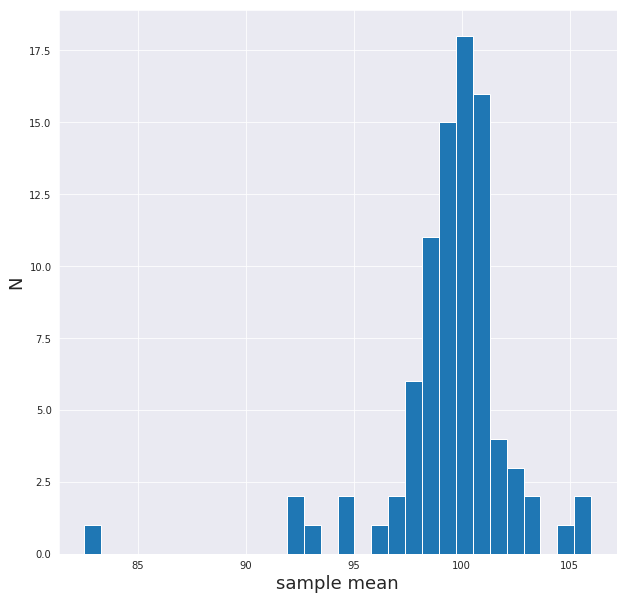

In [20]:
allmeans = list(newdict['pois']['means'].values())

pl.figure(figsize=(10, 10))
y = pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 7: Histogram of the distribution of the means of each one of the 999 samples with different sizes that follow the Poisson distribution. The most recurrent mean value for the distributions is between 98 and 101 with 18 counts, which is closed to expected mean value. Tha mean values go between ~82 and ~106.


# Do it for the Binomial distribution

In [21]:
np.random.binomial?

In [22]:
# fill dictionary in in a for loop. not pythonic, but easily readable
# newdict = {}
np.random.seed(34)
newdict['binomial'] = {}
for n in mysize:
    newdict['binomial'][n] = np.random.binomial(n=df/0.4, p=0.4, size = n) #all distributions have mean=df=100

Text(1259.94, 100, 'expected mean')

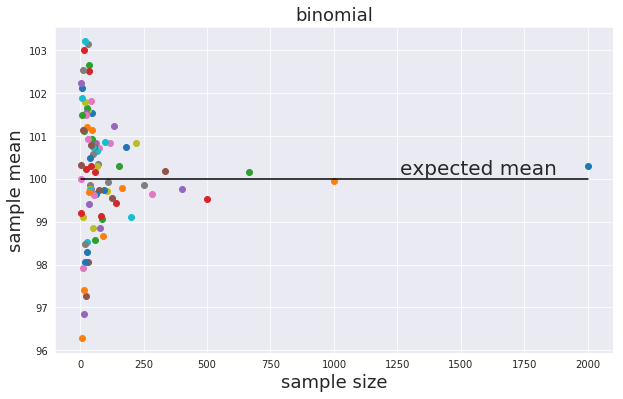

In [23]:
# save the means for plotting later    

newdict['binomial']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in newdict['binomial']:
    if not type(nn) == str: # needed because one element is "mean"
        newdict['binomial']['means'][nn] = newdict['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, newdict['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('binomial', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 8: Each dot represent the mean of each of the 999 samples of different size (between 3 and 2000) that follow the binomial distribution. For samples of small size ($\sim 0$ to $\sim 250$), the mean varies more beyond the expected mean 100. For larger samples ($\sim 250$ to $2000$), the variation of the mean, from the expected mean, are smaller. If we continue to increazed the sample size, the variations would be even smaller

Text(0, 0.5, 'N')

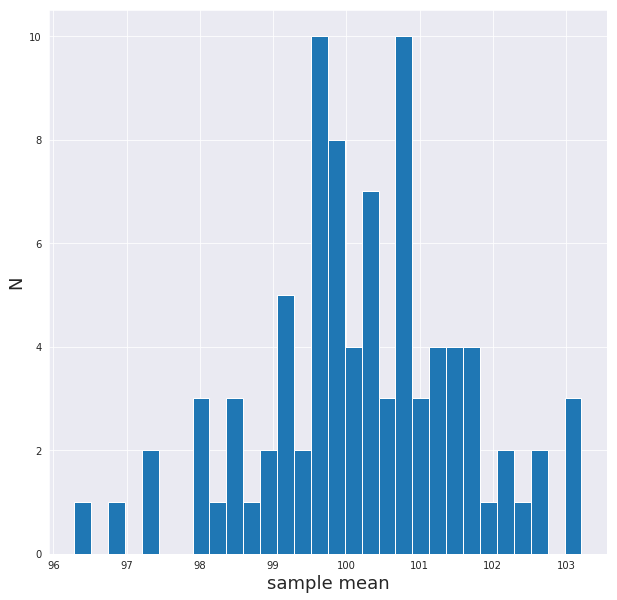

In [24]:
allmeans = list(newdict['binomial']['means'].values())

pl.figure(figsize=(10, 10))
y = pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 9: Histogram of the distribution of the means of each one of the 999 samples with different sizes that follow the Binomial distribution. The most recurrent mean value for the distributions is between 99 and 100 with 10 and between 100.8 and 101 counts, which is closed to expected mean value. Tha mean values go between ~96 and ~103.


# Do it for another distribution:
# Uniform

In [25]:
np.random.uniform?

In [26]:
# fill dictionary in in a for loop. not pythonic, but easily readable
newdict['uniform'] = {}
np.random.seed(34)
for n in mysize:
    newdict['uniform'][n] = np.random.uniform(low = 0, high = 200, size = n) #all distributions have mean=df=100

Text(1259.94, 100, 'expected mean')

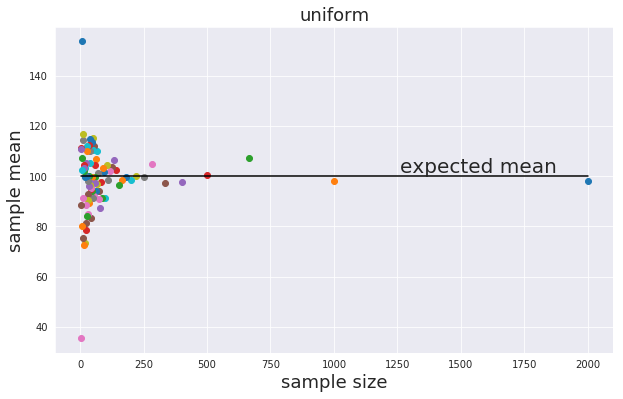

In [27]:
# save the means for plotting later    

newdict['uniform']['means'] = {}
# prepare the figure
ax = plt.figure(figsize=(10,6))

for nn in newdict['uniform']:
    if not type(nn) == str: # needed because one element is "mean"
        newdict['uniform']['means'][nn] = newdict['uniform'][nn].mean()
        #and plot it
        plt.plot(nn, newdict['uniform']['means'][nn], 'o')
        plt.xlabel('sample size', fontsize=18)
        plt.ylabel('sample mean', fontsize=18)
plt.title('uniform', fontsize=18)
plt.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.text(plt.xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 10: Each dot represent the mean of each of the 999 samples of different size (between 3 and 2000) that follow the Uniform distribution. For samples of small size ($\sim 0$ to $\sim 250$), the mean varies more beyond the expected mean 100. For larger samples ($\sim 250$ to $2000$), the variation of the mean, from the expected mean, are smaller. If we continue to increazed the sample size, the variations would be even smaller

Text(0, 0.5, 'N')

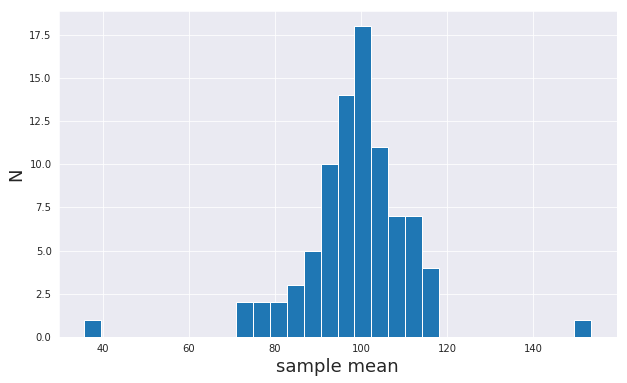

In [28]:
allmeans = list(newdict['uniform']['means'].values())

plt.figure(figsize=(10, 6))
y = plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

Figure 11: Histogram of the distribution of the means of each one of the 999 samples with different sizes that follow the Uniform distribution. The most recurrent mean value for the distributions is between 94 and 99 with 18 counts, which is closed to expected mean value. Tha mean values go between ~35 and ~153.


### Plot all the distributions of all sample means for the normal, chi-squared, poisson, uniform and binomial distributions.

Text(0, 0.5, 'N')

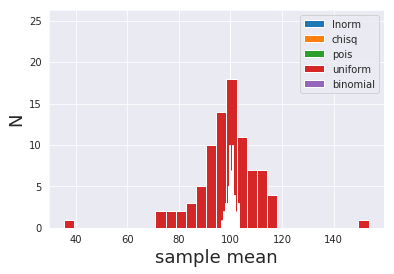

In [29]:
# -- put all the means together
distributions = ['lnorm','chisq', 'pois', 'uniform','binomial']

for d in distributions:
  # for nn in newdict[str(d)]:
    # print(newdict[str(d)]['means'])
    
  plt.hist(list(newdict[str(d)]['means'].values()),bins=30, label = "{}".format(d))
  plt.legend()
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)



Figura 12: Histogram of the distributions of the means for each one of the 5 distributions worked.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [30]:
import scipy
def gaussian(x, a, mu, sigma, c):
    ''' 
      Input: 
        - variable x
        - a: constant
        - mu: mean
        - sigma: standard deviation
        - c: constant
      Return the y value, according to the gaussian/normal distribution
    '''
    # g = ( 1 / (sigma*np.sqrt(2*np.pi)) ) * np.exp(-1*0.5*(x-mu)**2/(sigma**2))
    # g = mu*np.exp(-1*sigma*x**2)
    g = a * scipy.stats.norm.pdf(x,loc=mu,scale=sigma) + c

    return g

lnorm: 6.195216081125434, mu = 99.9933622935574, sigma = 0.12263893799669574, 0.4466422410106319
chisq: 26.67144851238764, mu = 100.26882190578388, sigma = 1.359008874281721, 0.9129036243592612
pois: 56.48353918937904, mu = 99.89643823616086, sigma = 1.2765987659898062, 0.49644659325809853
uniform: 301.48663587891025, mu = 99.82482750142024, sigma = 8.015702387989752, 0.3442393147602725
binomial: 14.117099155298693, mu = 100.2383434593075, sigma = 0.969732193838663, 0.8635851731417822


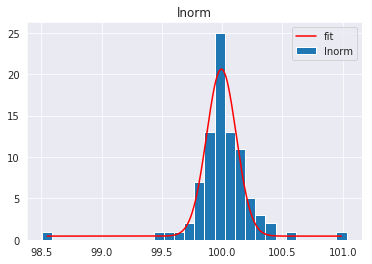

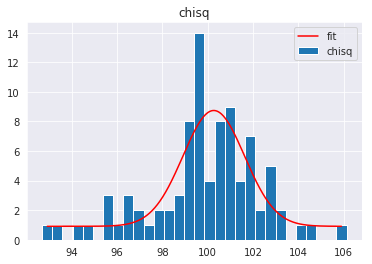

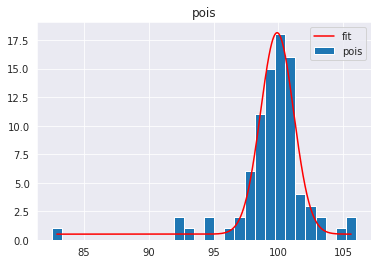

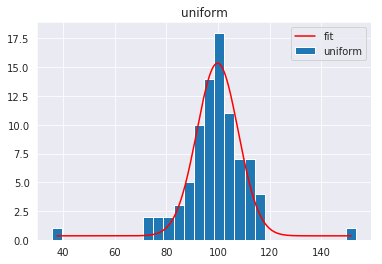

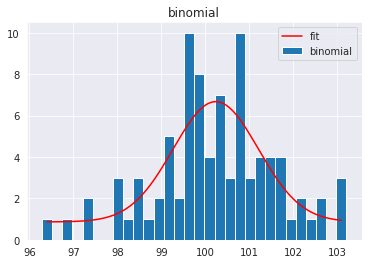

In [31]:
xxx = []
yyy = []
for d in distributions:
  pl.figure()
  pl.title(str(d))
  y = pl.hist(list(newdict[str(d)]['means'].values()),bins=30, label = str(d))
  xx = np.zeros((30))
  # take the central value for x axis, hist return the value of the edges of the bars
  for ii in range(len(y[1])-1):
    xx[ii] = (y[1][ii] + y[1][ii+1])/2
  popt, pcov = curve_fit(gaussian, xx,y[0], [2,100,2,2], maxfev=10000 )
  print("{}: {}, mu = {}, sigma = {}, {}".format(str(d),*popt))
  x = np.linspace(xx[0],xx[-1],1000)
  y_fit = gaussian(x, *popt)
  pl.plot(x,y_fit,'r-', label="fit")
  pl.legend()
  yyy.append(y[0])
  xxx.append(xx)
  
# pl.plot(xxx,yyy)

Figura 13: Histogram of the distribution of means for each one of the 5 distributions and the red curve represent the fit to a gaussian distribution with mean $\mu$ and standard deviation $\sigma$ of the histogram.

In [32]:
# xs = np.concatenate((xxx[0],xxx[1],xxx[2], xxx[3], xxx[4]))
# ys = np.concatenate((yyy[0],yyy[1],yyy[2], yyy[3], yyy[4]))

In [33]:
# popt, pcov = curve_fit(gaussian, xs,ys, [4,80,205,2], maxfev=10000 )
# print("{}, mu = {}, sigma = {}, {}".format(*popt))

In [34]:
# x = np.linspace(47,xs[-1],1000)
# y_fit = gaussian(x, *popt)
# pl.plot(x,y_fit,'r-', label="fit")
# pl.scatter(xs,ys, label="all distributions")

# # pl.xlim([99,101])

# plt.legend()

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

In [35]:
# To fit the data you can use scipy.minimize

In [36]:
from scipy import optimize
sp.optimize.minimize?

Object `sp.optimize.minimize` not found.


In [37]:
sp.optimize.fmin?

Object `sp.optimize.fmin` not found.


In [38]:
...

Ellipsis

---
<h1 style="color:red"> Great !</h1>
